### Data Preprocessing

In [4]:
from preprocessing_withval import Makeloader, create_loaders
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split, DataLoader
import numpy as np
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt



### Load Force/Accelerometer data

In [2]:

train_dirs = ['/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T1/',
              '/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T4/']
test_dirs = ['/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T5/',
             '/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T8/']# Directories containing your data

# Mode: Choose 'Acc', 'Force', or 'Mix'
mode = "Mix"

# Batch size
batch_size = 32

# Train:Validation split ratio (e.g., 0.9 for 90% train, 10% validation)
train_val_ratio = 0.9


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:

train_loader, val_loader = create_loaders(
    directories=train_dirs,
    mode=mode,
    batch_size=batch_size,
    train_val_ratio=train_val_ratio
)


test_loader = create_loaders(
    directories=test_dirs,  # Directories for test data
    mode=mode,
    batch_size=batch_size,
    train_val_ratio=None  # No train/val split for test data
)



### Regression models

In [5]:
from model import LSTMRegressor, GRURegressor, BiLSTMRegressor
from train import train_model
from test import evaluate_model
import numpy as np

In [6]:
# hyperparameter settings
input_size = next(iter(train_loader))[0].shape[1]  # Number of features
hidden_size = 128
num_layers = 2
output_size = 1
learning_rate = 0.001
batch_size = 32
epochs = 500

Epoch 1/200, Train Loss: 43217.6718, Val Loss: 36006.8244
Epoch 2/200, Train Loss: 32379.8409, Val Loss: 27753.1411
Epoch 3/200, Train Loss: 25035.5146, Val Loss: 21407.6134
Epoch 4/200, Train Loss: 19320.7328, Val Loss: 16454.1295
Epoch 5/200, Train Loss: 14858.1034, Val Loss: 12626.1165
Epoch 6/200, Train Loss: 11424.7773, Val Loss: 9721.5074
Epoch 7/200, Train Loss: 8843.9221, Val Loss: 7585.6935
Epoch 8/200, Train Loss: 6969.2846, Val Loss: 6066.5356
Epoch 9/200, Train Loss: 5648.0602, Val Loss: 5032.1705
Epoch 10/200, Train Loss: 4760.5937, Val Loss: 4363.0483
Epoch 11/200, Train Loss: 4197.2215, Val Loss: 3964.2053
Epoch 12/200, Train Loss: 3162.7085, Val Loss: 2329.8361
Epoch 13/200, Train Loss: 1975.3743, Val Loss: 1634.3454
Epoch 14/200, Train Loss: 1392.8787, Val Loss: 1204.8567
Epoch 15/200, Train Loss: 1025.8870, Val Loss: 893.9483
Epoch 16/200, Train Loss: 790.3890, Val Loss: 731.5300
Epoch 17/200, Train Loss: 618.6120, Val Loss: 600.6099
Epoch 18/200, Train Loss: 494.2066

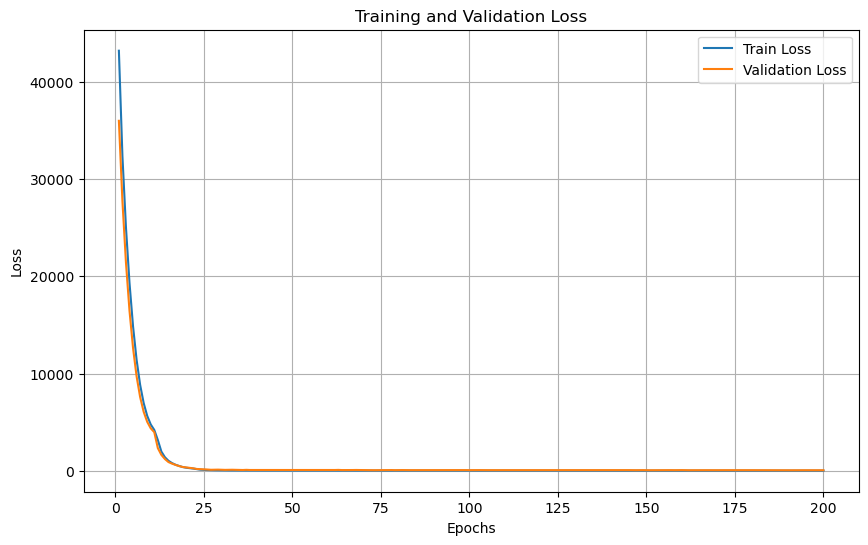

Train ended.


In [8]:
#model = BiLSTMRegressor(input_size=input_size,hidden_size= hidden_size, num_layers = num_layers, output_size = output_size).to(device)
#model = GRURegressor(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size).to(device)
model = LSTMRegressor(input_size=input_size,hidden_size= hidden_size, num_layers = num_layers, output_size = output_size).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=200)

print("Train ended.")


In [11]:
save_path = "./model_weights/regressor_T1.pth"


torch.save(model.state_dict(), save_path)
print(f"‚úÖ Î™®Îç∏Ïù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: {save_path}")


‚úÖ Î™®Îç∏Ïù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: ./model_weights/regressor_T1.pth


Evaluation Metrics:
RMSE: 20.0382
MAE: 17.3423
R¬≤ Score: 0.8734
MAPE: 9.67%
Explained Variance Score: 0.9080


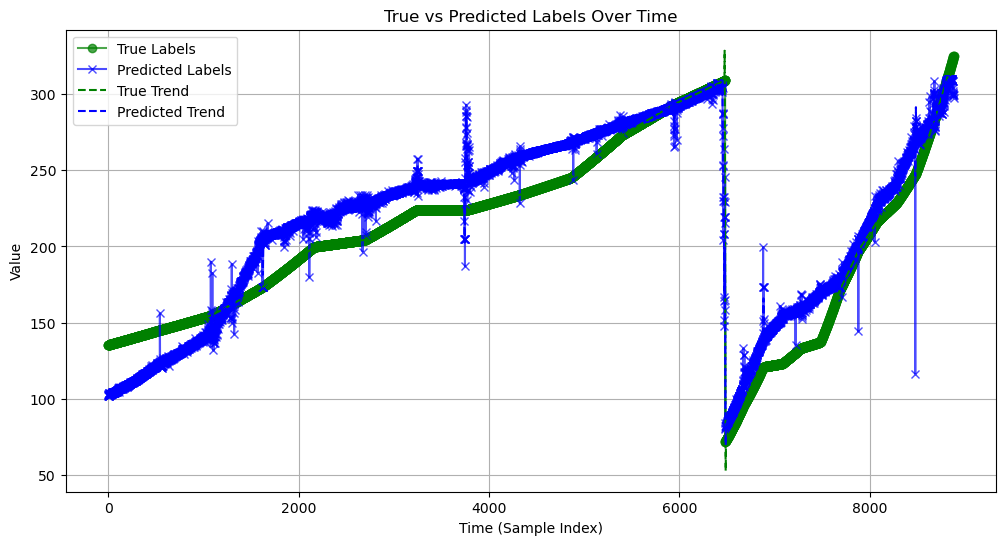

Test Metrics:
RMSE: 20.0382
MAE: 17.3423
R¬≤ Score: 0.8734
MAPE: 9.67%
Explained Variance Score: 0.9080


In [9]:
# Evaluate the model and visualize
metrics, all_preds, all_labels = evaluate_model(model, test_loader, device) #T5 Í≤ÄÏ¶ùÏö©

print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R¬≤ Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

In [13]:
# when you just want to load saved model
regressor = LSTMRegressor(input_size=input_size,hidden_size= hidden_size, num_layers = num_layers, output_size = output_size).to(device)
save_path = "./model_weights/regressor_T1.pth"

regressor.load_state_dict(torch.load(save_path))
regressor.eval()  # ÌèâÍ∞Ä Î™®ÎìúÎ°ú ÏÑ§Ï†ï
print("‚úÖ Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôîÏäµÎãàÎã§.")


‚úÖ Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôîÏäµÎãàÎã§.


In [14]:
train_loader_real = create_loaders(
    directories=train_dirs,  
    mode=mode,
    batch_size=batch_size,
    train_val_ratio=None  
) # for learning mlp layer using T1

Evaluation Metrics:
RMSE: 2.9799
MAE: 0.8647
R¬≤ Score: 0.9975
MAPE: 0.43%
Explained Variance Score: 0.9975


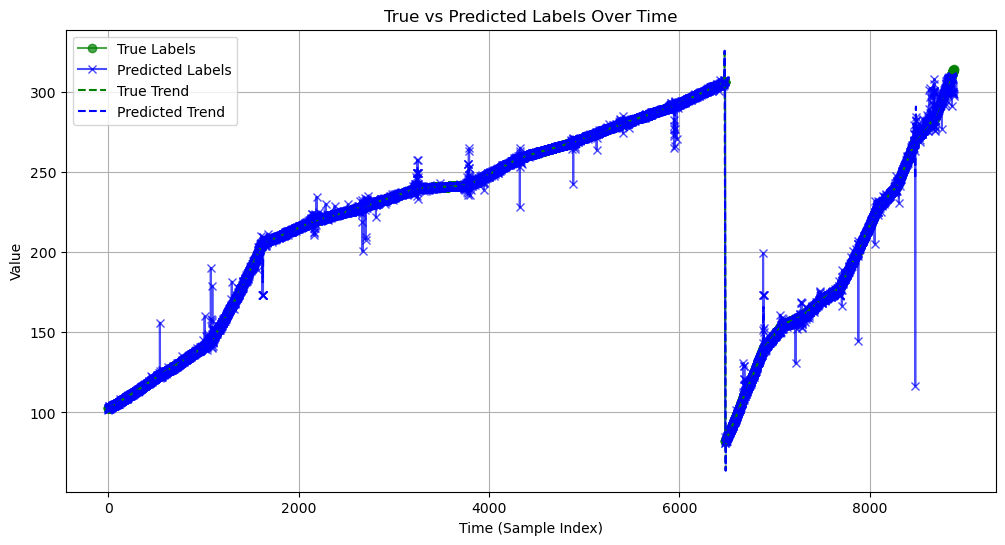

Test Metrics:
RMSE: 2.9799
MAE: 0.8647
R¬≤ Score: 0.9975
MAPE: 0.43%
Explained Variance Score: 0.9975


In [16]:
# use this predictions for learning mlp layer
metrics, all_preds, all_labels = evaluate_model(regressor, train_loader_real, device)

print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R¬≤ Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

In [17]:
print(len(all_preds))

8880


In [18]:
import pandas as pd


df_regression_predictions = pd.DataFrame({
    "Regression_Output": all_preds[:6480],  # predicted value of T1
    "True_Labels": all_labels[:6480]        # True label of T1
})

# CSV ÌååÏùºÎ°ú Ï†ÄÏû•
df_regression_predictions.to_csv("regressiontrainset_for_mlp.csv", index=False)

print("Regression Predictions saved as 'regressiontrainset_for_mlp.csv'.")


Regression Predictions saved as 'regressiontrainset_for_mlp.csv'.


### False alarm Scenario (w/o multimodal)

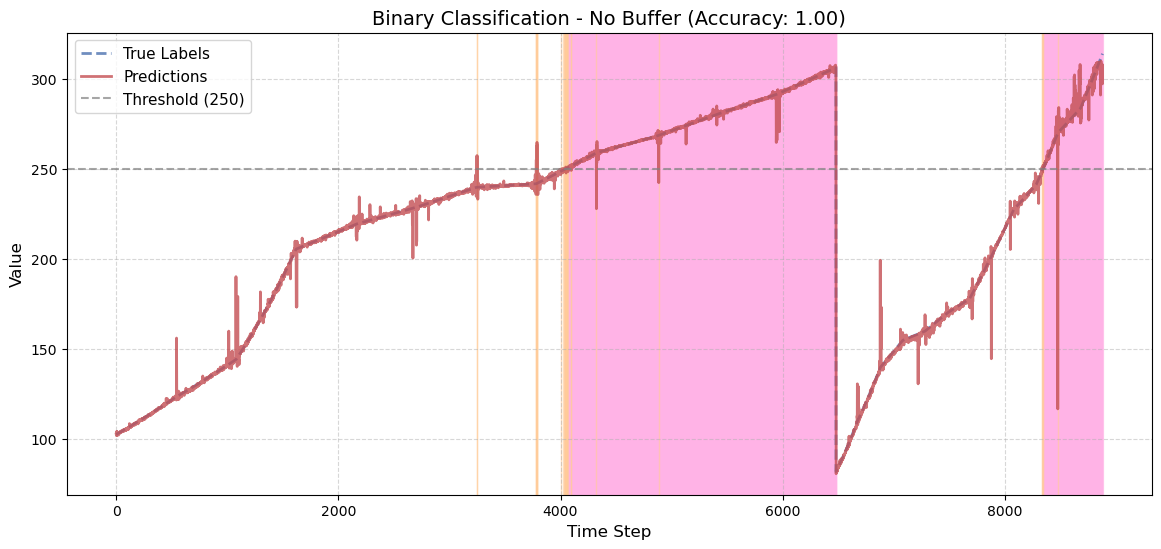

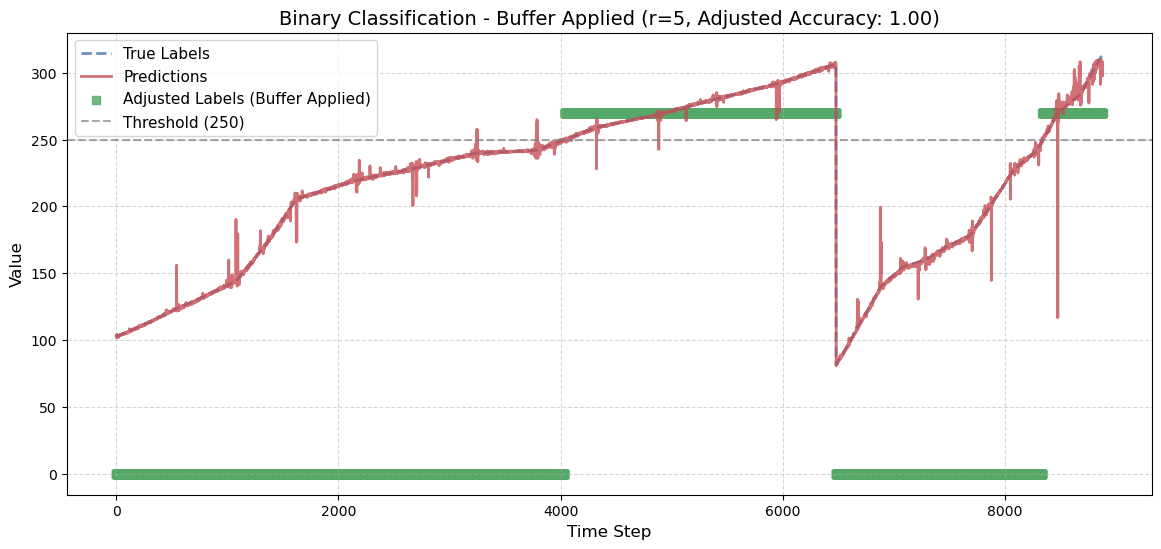

In [20]:
import numpy as np
import matplotlib.pyplot as plt


all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
time_steps = len(all_preds)  


binary_preds = (all_preds > 250).astype(int)
binary_labels = (all_labels > 250).astype(int)
accuracy = np.mean(binary_preds == binary_labels)


r = 5  
adjusted_labels = np.copy(binary_labels)


for i in range(1, time_steps):
    if all_labels[i] > 250:
        adjusted_labels[max(0, i - r):i] = 1  

adjusted_accuracy = np.mean(binary_preds == adjusted_labels)


plt.figure(figsize=(14, 6))
plt.plot(all_labels, label="True Labels", color="#4c72b0", linewidth=2, linestyle="dashed", alpha=0.8)
plt.plot(all_preds, label="Predictions", color="#c44e52", linewidth=2, linestyle="solid", alpha=0.8)


for i in range(time_steps):
    if all_labels[i] > 250: #as domain knowledge
        plt.axvspan(i - 0.5, i + 0.5, color="#ffb3e6", alpha=0.4)  

# False Prediction 
false_preds = np.where(binary_preds != binary_labels)[0]
for i in false_preds:
    plt.axvspan(i - 0.5, i + 0.5, color="#ffcc99", alpha=0.6) 

# Threshold line
plt.axhline(y=250, color="gray", linestyle="--", linewidth=1.5, alpha=0.7, label="Threshold (250)")


plt.xlabel("Time Step", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.title(f"Binary Classification - No Buffer (Accuracy: {accuracy:.2f})", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


plt.figure(figsize=(14, 6))
plt.plot(all_labels, label="True Labels", color="#4c72b0", linewidth=2, linestyle="dashed", alpha=0.8)
plt.plot(all_preds, label="Predictions", color="#c44e52", linewidth=2, linestyle="solid", alpha=0.8)

plt.scatter(range(time_steps), adjusted_labels * 270, color="#55a868", marker="s", alpha=0.8, label="Adjusted Labels (Buffer Applied)")

plt.axhline(y=250, color="gray", linestyle="--", linewidth=1.5, alpha=0.7, label="Threshold (250)")

plt.xlabel("Time Step", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.title(f"Binary Classification - Buffer Applied (r={r}, Adjusted Accuracy: {adjusted_accuracy:.2f})", fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


### Classifier Train

In [10]:
from model import CNNClassifier, EfficientNetBinary, MobileNetBinary, ResNetClassifier
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 
from utils import MelSpectrogramDataset, evaluate_model, train_model, plot_loss_curve

batch_size = 128
num_epochs = 20
learning_rate = 0.001
train_anomaly_threshold = 4041  # T1's index 
test_anomaly_threshold = 4961  # T5's index

train_data_dir_acus= "/home/crois-times/timeseries/JJ/Harvard_Multimodal/Mel_spectrogram/T1"  # T1: Train + Val

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = CNNClassifier().to(device)
#eff = EfficientNetBinary(pretrained=True).to(device)
# mob = MobileNetBinary(pretrained=False).to(device)
# res = ResNetClassifier(pretrained=False).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [22]:

from utils import evaluate_model, train_model, plot_loss_curve

train_dataset = MelSpectrogramDataset(
    data_dir=train_data_dir_acus,
    anomaly_threshold=4041
)

# Train/Validation Split (80% Train, 20% Val)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)



In [23]:
train_model(model, train_loader, val_loader, criterion, optimizer, device, num_epochs) #batch sizeÏóê Îß§Ïö∞ ÎØºÍ∞ê


‚úÖ Saved best model (Val Loss: 0.5802)
[1/20] Train Loss: 0.7483, Acc: 0.6069 | Val Loss: 0.5802, Acc: 0.7114


‚úÖ Saved best model (Val Loss: 0.5352)
[2/20] Train Loss: 0.5571, Acc: 0.7054 | Val Loss: 0.5352, Acc: 0.7369


‚úÖ Saved best model (Val Loss: 0.5006)
[3/20] Train Loss: 0.5146, Acc: 0.7303 | Val Loss: 0.5006, Acc: 0.7431


‚úÖ Saved best model (Val Loss: 0.3965)
[4/20] Train Loss: 0.4566, Acc: 0.7787 | Val Loss: 0.3965, Acc: 0.7955


‚úÖ Saved best model (Val Loss: 0.3165)
[5/20] Train Loss: 0.3395, Acc: 0.8573 | Val Loss: 0.3165, Acc: 0.8418


‚úÖ Saved best model (Val Loss: 0.2000)
[6/20] Train Loss: 0.2173, Acc: 0.9163 | Val Loss: 0.2000, Acc: 0.9252


‚úÖ Saved best model (Val Loss: 0.1450)
[7/20] Train Loss: 0.1466, Acc: 0.9454 | Val Loss: 0.1450, Acc: 0.9421


[8/20] Train Loss: 0.1006, Acc: 0.9657 | Val Loss: 0.1462, Acc: 0.9390


‚úÖ Saved best model (Val Loss: 0.0692)
[9/20] Train Loss: 0.0729, Acc: 0.9780 | Val Loss: 0.0692, Acc: 0.9761


[10/20] Train Loss: 0.0487, Acc: 0.9898 | Val Loss: 0.0768, Acc: 0.9691


‚úÖ Saved best model (Val Loss: 0.0402)
[11/20] Train Loss: 0.0356, Acc: 0.9919 | Val Loss: 0.0402, Acc: 0.9869


[12/20] Train Loss: 0.0276, Acc: 0.9938 | Val Loss: 0.0684, Acc: 0.9707


‚úÖ Saved best model (Val Loss: 0.0317)
[13/20] Train Loss: 0.0276, Acc: 0.9913 | Val Loss: 0.0317, Acc: 0.9892


‚úÖ Saved best model (Val Loss: 0.0227)
[14/20] Train Loss: 0.0180, Acc: 0.9965 | Val Loss: 0.0227, Acc: 0.9954


[15/20] Train Loss: 0.0179, Acc: 0.9959 | Val Loss: 0.0258, Acc: 0.9946


‚úÖ Saved best model (Val Loss: 0.0166)
[16/20] Train Loss: 0.0100, Acc: 0.9992 | Val Loss: 0.0166, Acc: 0.9969


[17/20] Train Loss: 0.0058, Acc: 0.9998 | Val Loss: 0.0170, Acc: 0.9946


‚úÖ Saved best model (Val Loss: 0.0154)
[18/20] Train Loss: 0.0052, Acc: 0.9998 | Val Loss: 0.0154, Acc: 0.9969


‚úÖ Saved best model (Val Loss: 0.0144)
[19/20] Train Loss: 0.0038, Acc: 1.0000 | Val Loss: 0.0144, Acc: 0.9961


‚úÖ Saved best model (Val Loss: 0.0121)
[20/20] Train Loss: 0.0037, Acc: 1.0000 | Val Loss: 0.0121, Acc: 0.9969


In [24]:
# Ï†ÄÏû•Ìï† Í≤ΩÎ°ú
save_path = "./model_weights/classifier_T1.pth"

# Î™®Îç∏ Ï†ÄÏû•
torch.save(model.state_dict(), save_path)
print(f"‚úÖ Î™®Îç∏Ïù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: {save_path}")


‚úÖ Î™®Îç∏Ïù¥ Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§: ./model_weights/classifier_T1.pth


In [6]:
# when you just want to load saved model
classifier = CNNClassifier().to(device)
save_path = "./model_weights/classifier_T1.pth"

classifier.load_state_dict(torch.load(save_path))
classifier.eval()  # ÌèâÍ∞Ä Î™®ÎìúÎ°ú ÏÑ§Ï†ï
print("‚úÖ Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôîÏäµÎãàÎã§.")


‚úÖ Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏôîÏäµÎãàÎã§.


### Classifier Inference

In [7]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
from PIL import Image
from utils import MelSpectrogramDataset, evaluate_model, train_model, plot_loss_curve
from utils import evaluate_test


test_data_dir_acus = "/home/crois-times/timeseries/JJ/Harvard_Multimodal/Mel_spectrogram/T5"  # T5: Test
test_dataset = MelSpectrogramDataset(test_data_dir_acus, anomaly_threshold = 4961)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)  

In [11]:
train = MelSpectrogramDataset(train_data_dir_acus, anomaly_threshold = 4041)
train_loader = DataLoader(train, batch_size=128, shuffle=False)  
train_predictions = evaluate_test(classifier, train_loader)


Test Accuracy: 0.9994


In [22]:
train_predictions # for training mlp layers

[(0, 0.500996),
 (0, 0.5009697),
 (0, 0.50053275),
 (0, 0.500124),
 (0, 0.50160766),
 (0, 0.5009793),
 (0, 0.5002574),
 (0, 0.5001982),
 (0, 0.5004637),
 (0, 0.5001299),
 (0, 0.5000367),
 (0, 0.50002664),
 (0, 0.5006709),
 (0, 0.50020325),
 (0, 0.50013053),
 (0, 0.5000289),
 (0, 0.5001849),
 (0, 0.5003027),
 (0, 0.5000435),
 (0, 0.50023264),
 (0, 0.50041145),
 (0, 0.5017908),
 (0, 0.5002103),
 (0, 0.50004333),
 (0, 0.50010484),
 (0, 0.5000371),
 (0, 0.50006163),
 (0, 0.5000157),
 (0, 0.5000104),
 (0, 0.5000412),
 (0, 0.5002562),
 (0, 0.50008374),
 (0, 0.5000631),
 (0, 0.5001771),
 (0, 0.5003182),
 (0, 0.5000123),
 (0, 0.50007915),
 (0, 0.50016767),
 (0, 0.5005608),
 (0, 0.5000841),
 (0, 0.5000034),
 (0, 0.5000578),
 (0, 0.5000298),
 (0, 0.50009096),
 (0, 0.5000555),
 (0, 0.5001468),
 (0, 0.5003095),
 (0, 0.50015444),
 (0, 0.5006685),
 (0, 0.5003707),
 (0, 0.50199366),
 (0, 0.5010498),
 (0, 0.50014603),
 (0, 0.5000972),
 (0, 0.5005488),
 (0, 0.5000965),
 (0, 0.500175),
 (0, 0.5000208),


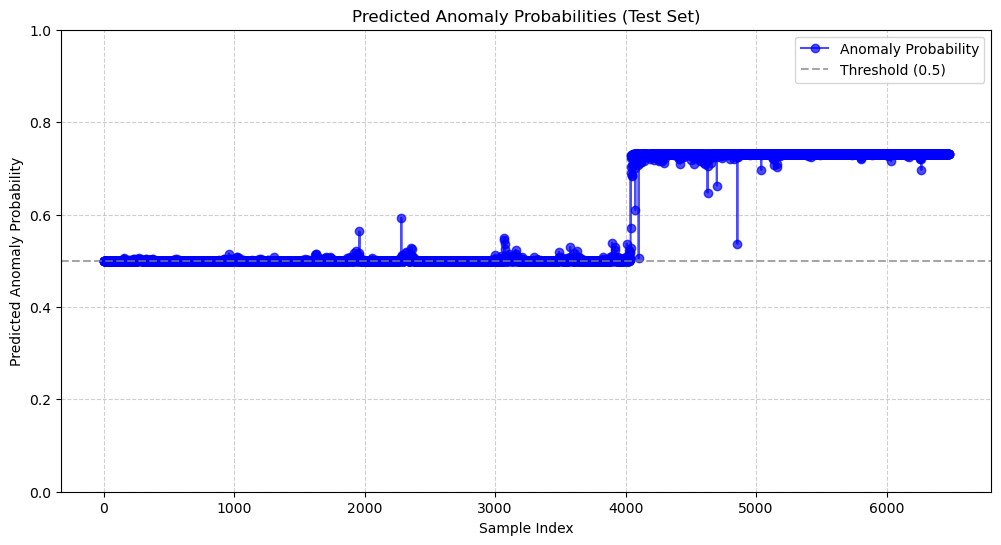

In [12]:
import matplotlib.pyplot as plt

def plot_anomaly_probabilities(predictions):
    # ‚úÖ ÏòàÏ∏° ÌôïÎ•†Îßå Ï∂îÏ∂ú (Anomaly ÌôïÎ•†)
    anomaly_probs = [prob for _, prob in predictions]

    # ‚úÖ ÏãúÍ∞ÅÌôî (ÏÑ† Í∑∏ÎûòÌîÑ)
    plt.figure(figsize=(12, 6))
    plt.plot(anomaly_probs, marker="o", linestyle="-", color="blue", alpha=0.7, label="Anomaly Probability")
    plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, label="Threshold (0.5)")  # Í∏∞Ï§ÄÏÑ† Ï∂îÍ∞Ä
    plt.xlabel("Sample Index")
    plt.ylabel("Predicted Anomaly Probability")
    plt.title("Predicted Anomaly Probabilities (Test Set)")
    plt.ylim(0, 1)  # ÌôïÎ•† Î≤îÏúÑ Í≥†Ï†ï (0~1)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# ‚úÖ ÏòàÏ∏°Îêú ÌôïÎ•†Í∞íÏùÑ ÏãúÍ∞ÅÌôî
plot_anomaly_probabilities(train_predictions)


In [13]:
import pandas as pd

# ‚úÖ CNN ÏòàÏ∏° ÌôïÎ•†Í∞íÏùÑ Ï†ÄÏû•Ìï† DataFrame ÏÉùÏÑ±
df_cnn_predictions = pd.DataFrame({
    "Anomaly_Probability": [prob for _, prob in train_predictions]
})

# ‚úÖ CSV ÌååÏùºÎ°ú Ï†ÄÏû•
df_cnn_predictions.to_csv("classifiertrainset_for_mlp.csv", index=False)

print("CNN Predictions saved as 'classifiertrainset_for_mlp.csv'.")


CNN Predictions saved as 'classifiertrainset_for_mlp.csv'.


### Multimodal-inference(stacking layer)

In [16]:
lstm_predictions = pd.read_csv('regressiontrainset_for_mlp.csv')

In [14]:
cnn_predictions = pd.read_csv('classifiertrainset_for_mlp.csv')

In [17]:
cnn_predictions

Anomaly_Probability
0                0.500000
1                0.500001
2                0.500000
3                0.500000
4                0.500077
...                   ...
6475             0.731038
6476             0.730944
6477             0.731029
6478             0.730324
6479             0.730925

[6480 rows x 1 columns]

In [18]:
lstm_predictions

Regression_Output  True_Labels
0            102.716866   102.472000
1            102.356050   102.507324
2            102.947420   102.542660
3            101.816890   102.578010
4            103.386116   102.613370
...                 ...          ...
6475         307.310060   306.336120
6476         307.858150   306.364600
6477         306.826350   306.393070
6478         307.160830   306.421540
6479         306.376040   306.450000

[6480 rows x 2 columns]

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from model import MLPStacking, RUL_MLP


# StackingÏùÑ ÏúÑÌïú Feature ÏÉùÏÑ± (GRU ÏòàÏ∏°Í∞í Ïïû 6480Í∞úÎßå ÏÇ¨Ïö©)
X_meta = np.column_stack((lstm_predictions["Regression_Output"], cnn_predictions["Anomaly_Probability"]))  # (LSTM Prediction, CNN probabilities)
y_meta = np.array([1 if i >= 4961 else 0 for i in range(6480)])  # Ground Truth for T5

#PyTorch Tensor Î≥ÄÌôò
X_meta_tensor = torch.tensor(X_meta, dtype=torch.float32)
y_meta_tensor = torch.tensor(y_meta, dtype=torch.float32).unsqueeze(1)  # (batch_size, 1) ÌòïÌÉúÎ°ú Î≥ÄÌôò


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_meta.shape[1]  # Feature Í∞úÏàò (2Í∞ú: GRU + CNN)
mlp_model = MLPStacking(input_dim).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.001)


X_meta_tensor, y_meta_tensor = X_meta_tensor.to(device), y_meta_tensor.to(device)


num_epochs = 20000
for epoch in range(num_epochs):
    mlp_model.train()
    optimizer.zero_grad()
    
    outputs = mlp_model(X_meta_tensor)
    loss = criterion(outputs, y_meta_tensor)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


mlp_model.eval()
with torch.no_grad():
    final_predictions = (mlp_model(X_meta_tensor) > 0.5).cpu().numpy().astype(int)

final_accuracy = accuracy_score(y_meta, final_predictions)
print(f"Final Stacked Model Accuracy (MLP): {final_accuracy:.4f}")


Epoch [10/20000], Loss: 0.6480
Epoch [20/20000], Loss: 0.6401
Epoch [30/20000], Loss: 0.6403
Epoch [40/20000], Loss: 0.6243
Epoch [50/20000], Loss: 0.6199
Epoch [60/20000], Loss: 0.6187
Epoch [70/20000], Loss: 0.6175
Epoch [80/20000], Loss: 0.6163
Epoch [90/20000], Loss: 0.6150
Epoch [100/20000], Loss: 0.6137
Epoch [110/20000], Loss: 0.6123
Epoch [120/20000], Loss: 0.6109
Epoch [130/20000], Loss: 0.6094
Epoch [140/20000], Loss: 0.6079
Epoch [150/20000], Loss: 0.6063
Epoch [160/20000], Loss: 0.6047
Epoch [170/20000], Loss: 0.6031
Epoch [180/20000], Loss: 0.6014
Epoch [190/20000], Loss: 0.5996
Epoch [200/20000], Loss: 0.5978
Epoch [210/20000], Loss: 0.5959
Epoch [220/20000], Loss: 0.5940
Epoch [230/20000], Loss: 0.5920
Epoch [240/20000], Loss: 0.5900
Epoch [250/20000], Loss: 0.5878
Epoch [260/20000], Loss: 0.5856
Epoch [270/20000], Loss: 0.5833
Epoch [280/20000], Loss: 0.5809
Epoch [290/20000], Loss: 0.5785
Epoch [300/20000], Loss: 0.5759
Epoch [310/20000], Loss: 0.5732
Epoch [320/20000]

In [20]:

torch.save(mlp_model.state_dict(), "model_weights/mlp_binaryprediction.pth")


In [21]:

mlp_model = MLPStacking(input_dim=input_dim).to(device)
mlp_model.load_state_dict(torch.load("model_weights/mlp_binaryprediction.pth", map_location=device))
mlp_model.eval()

MLPStacking(
  (fc1): Linear(in_features=2, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [24]:
import pandas as pd
import torch
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# === T5 TESTÏö© CSV Î∂àÎü¨Ïò§Í∏∞ ===
df_cnn_test = pd.read_csv("cnn_predictions.csv")  # CNN ÌôïÎ•†
df_gru_test = pd.read_csv("regression_predictions_lstm_T5.csv")  # GRU ÏòàÏ∏°Í∞í

# === Feature ÏÉùÏÑ± (CNN ÌôïÎ•† + GRU ÌöåÍ∑Ä ÏòàÏ∏°Í∞í)
X_test = np.column_stack((df_gru_test["Regression_Output"][:6480], df_cnn_test["Anomaly_Probability"]))

# === Ground Truth ÎùºÎ≤® ÏÉùÏÑ± (ÏòàÏãú: T5ÏóêÏÑú 4961 Ïù¥ÌõÑÎäî Ïù¥ÏÉÅÏù¥ÎùºÍ≥† Í∞ÄÏ†ï)
y_test = np.array([1 if i >= 4961 else 0 for i in range(len(X_test))])

# === TensorÎ°ú Î≥ÄÌôò
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)

# === MLP Î™®Îç∏ ÌèâÍ∞Ä
mlp_model.eval()
with torch.no_grad():
    y_pred_prob = mlp_model(X_test_tensor).cpu().numpy()
    y_pred_cls = (y_pred_prob > 0.5).astype(int)

# === ÏßÄÌëú Ï∂úÎ†•
print("Test ÏÑ±Îä• ÌèâÍ∞Ä")
print(f"Accuracy : {accuracy_score(y_test, y_pred_cls):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_cls):.4f}")
print(f"AUROC    : {roc_auc_score(y_test, y_pred_prob):.4f}")


Test ÏÑ±Îä• ÌèâÍ∞Ä
Accuracy : 0.9861
F1 Score : 0.9700
AUROC    : 0.9935


### RUL Prediction

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd

y_rul = np.array([max(0, (4960 - i) * 0.1) for i in range(6480)])  # Train RUL MLP


X_tensor = torch.tensor(X_meta, dtype=torch.float32)
y_tensor = torch.tensor(y_rul, dtype=torch.float32).unsqueeze(1)  # (batch_size, 1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = X_meta.shape[1]
model = RUL_MLP(input_dim).to(device)
criterion = nn.MSELoss()  # ÌöåÍ∑ÄÎãàÍπå MSE!
optimizer = optim.Adam(model.parameters(), lr=0.001)

X_tensor, y_tensor = X_tensor.to(device), y_tensor.to(device)

num_epochs = 20000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    preds = model(X_tensor)
    loss = criterion(preds, y_tensor)

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f"[{epoch+1}/{num_epochs}] Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    predictions = model(X_tensor).cpu().numpy().flatten()


for i, p in enumerate(predictions[:10]):
    print(f" for timestep {i+1}: Remaining Useful Time: {p:.1f} sec")


[500/20000] Loss: 41406.9688
[1000/20000] Loss: 41103.2812
[1500/20000] Loss: 38545.7031
[2000/20000] Loss: 7704.5078
[2500/20000] Loss: 3567.0242
[3000/20000] Loss: 1568.0529
[3500/20000] Loss: 630.3590
[4000/20000] Loss: 303.8835
[4500/20000] Loss: 203.3003
[5000/20000] Loss: 157.5264
[5500/20000] Loss: 149.7225
[6000/20000] Loss: 140.8194
[6500/20000] Loss: 139.0800
[7000/20000] Loss: 139.3308
[7500/20000] Loss: 140.5291
[8000/20000] Loss: 137.5091
[8500/20000] Loss: 138.0945
[9000/20000] Loss: 133.7985
[9500/20000] Loss: 136.7125
[10000/20000] Loss: 133.4138
[10500/20000] Loss: 138.5405
[11000/20000] Loss: 129.4930
[11500/20000] Loss: 128.8586
[12000/20000] Loss: 127.9229
[12500/20000] Loss: 126.4865
[13000/20000] Loss: 125.5082
[13500/20000] Loss: 128.4566
[14000/20000] Loss: 124.3084
[14500/20000] Loss: 126.9921
[15000/20000] Loss: 122.4780
[15500/20000] Loss: 135.2863
[16000/20000] Loss: 123.2506
[16500/20000] Loss: 122.6052
[17000/20000] Loss: 120.7286
[17500/20000] Loss: 124.7

In [23]:

torch.save(model.state_dict(), "model_weights/rul_mlp_model.pth")


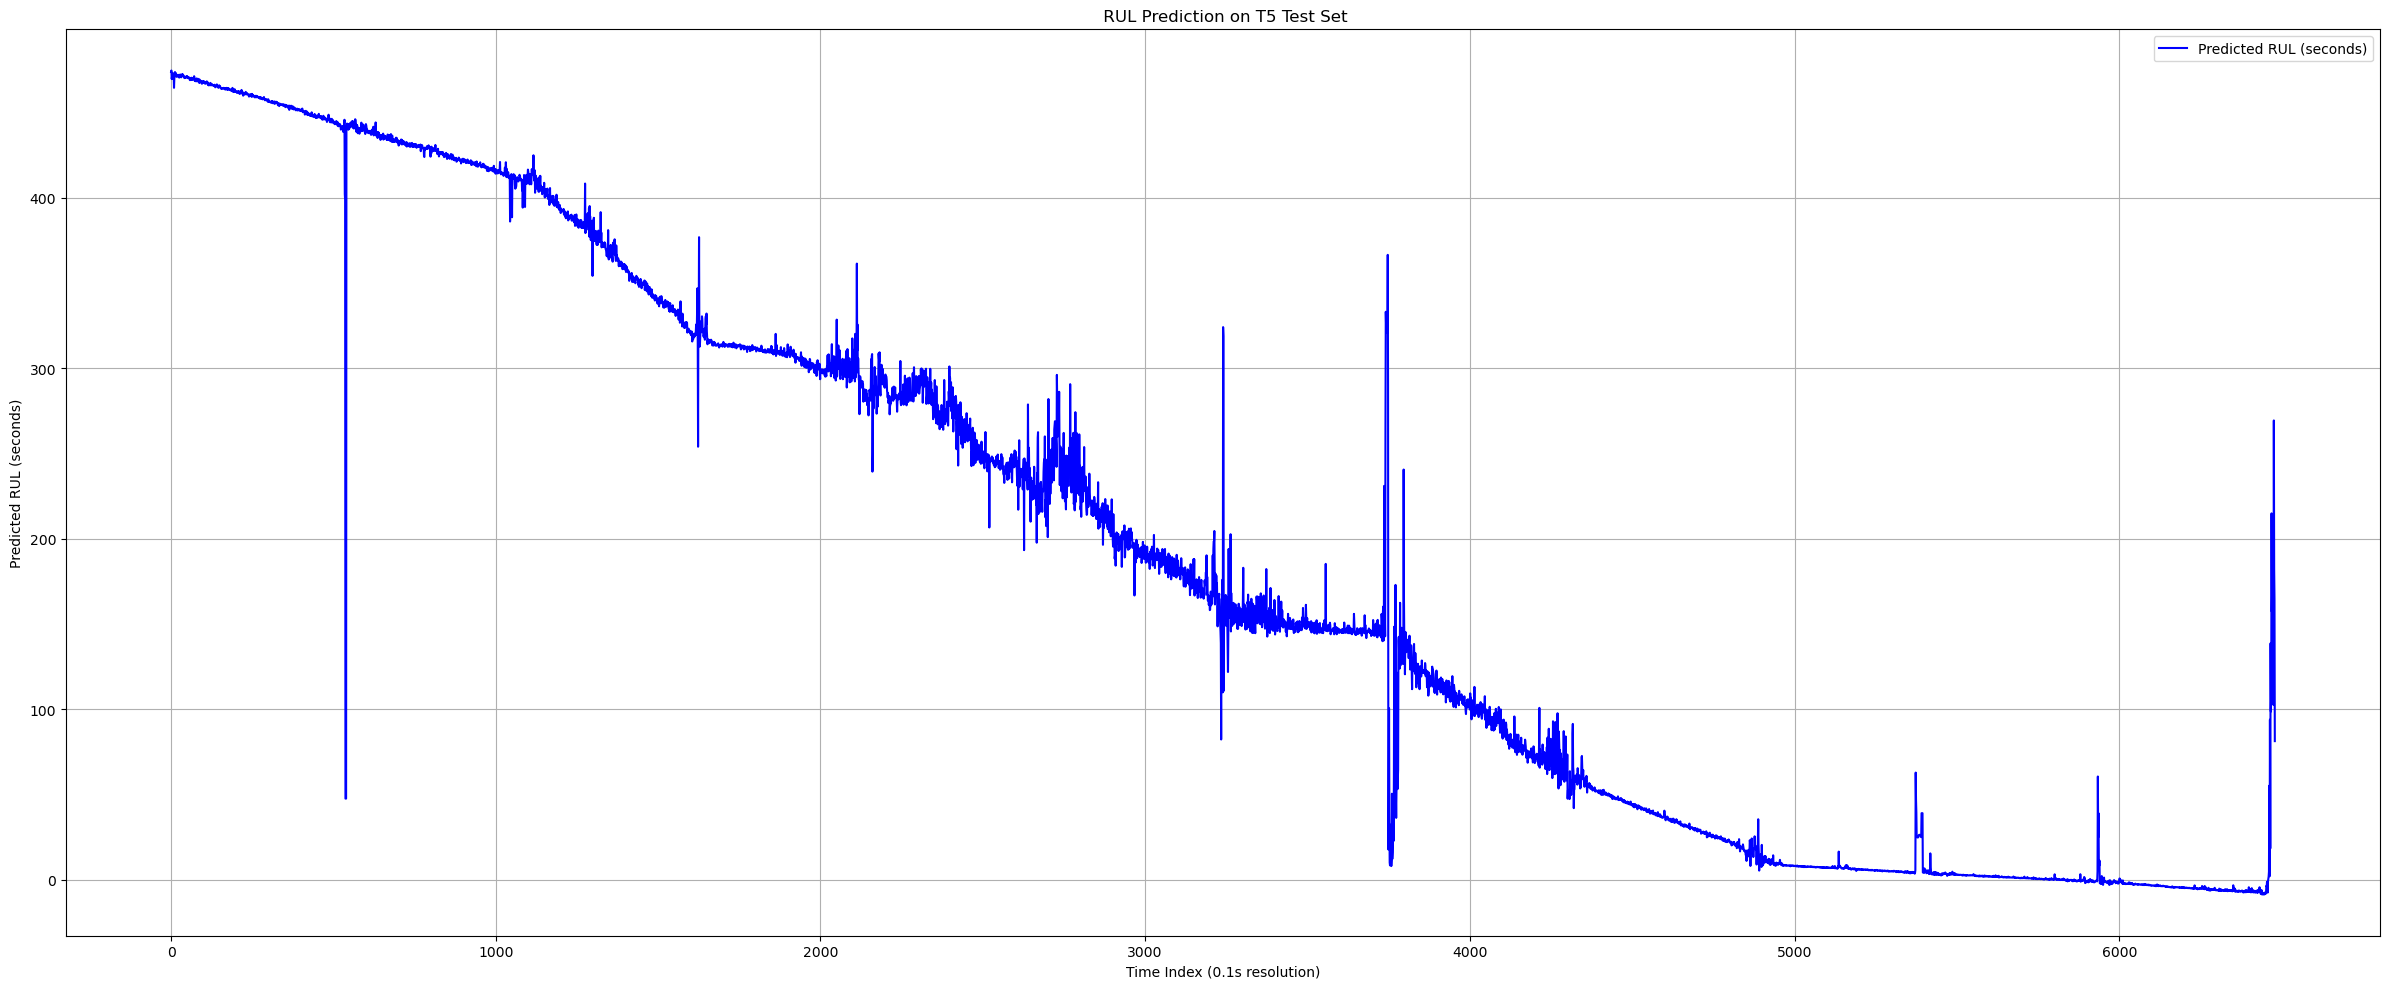


üîç ÏÉòÌîåÎ≥Ñ ÏòàÏ∏° RUL (Ïïû 20Í∞ú):
Sample 1: ‚è≥ Predicted RUL = 473.9 seconds
Sample 2: ‚è≥ Predicted RUL = 474.6 seconds
Sample 3: ‚è≥ Predicted RUL = 469.7 seconds
Sample 4: ‚è≥ Predicted RUL = 471.3 seconds
Sample 5: ‚è≥ Predicted RUL = 469.9 seconds
Sample 6: ‚è≥ Predicted RUL = 472.9 seconds
Sample 7: ‚è≥ Predicted RUL = 472.5 seconds
Sample 8: ‚è≥ Predicted RUL = 472.7 seconds
Sample 9: ‚è≥ Predicted RUL = 472.9 seconds
Sample 10: ‚è≥ Predicted RUL = 464.5 seconds
Sample 11: ‚è≥ Predicted RUL = 470.1 seconds
Sample 12: ‚è≥ Predicted RUL = 471.0 seconds
Sample 13: ‚è≥ Predicted RUL = 473.7 seconds
Sample 14: ‚è≥ Predicted RUL = 472.9 seconds
Sample 15: ‚è≥ Predicted RUL = 472.5 seconds
Sample 16: ‚è≥ Predicted RUL = 473.0 seconds
Sample 17: ‚è≥ Predicted RUL = 472.1 seconds
Sample 18: ‚è≥ Predicted RUL = 471.1 seconds
Sample 19: ‚è≥ Predicted RUL = 470.9 seconds
Sample 20: ‚è≥ Predicted RUL = 472.0 seconds


In [25]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

# === ‚úÖ T5 TEST Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ ===
df_cnn_test = pd.read_csv("cnn_predictions.csv")  # CNN ÌôïÎ•†
df_gru_test = pd.read_csv("regression_predictions_lstm_T5.csv")  # GRU ÏòàÏ∏°Í∞í

# === ‚úÖ Feature Íµ¨ÏÑ± ===
X_test = np.column_stack((df_gru_test["Regression_Output"][:6480], df_cnn_test["Anomaly_Probability"]))

# === ‚úÖ Tensor Î≥ÄÌôò
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

# === ‚úÖ ÌïôÏäµÎêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
model = RUL_MLP(input_dim=2).to(device)
model.load_state_dict(torch.load("model_weights/rul_mlp_model.pth"))
model.eval()

# === ‚úÖ ÏòàÏ∏°
with torch.no_grad():
    rul_predictions = model(X_test_tensor).cpu().numpy().flatten()

# === ‚úÖ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(24, 10))
plt.plot(rul_predictions, label='Predicted RUL (seconds)', color='blue')
plt.xlabel('Time Index (0.1s resolution)')
plt.ylabel('Predicted RUL (seconds)')
plt.title(' RUL Prediction on T5 Test Set')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === ‚úÖ ÏòàÏãú Ï∂úÎ†• (Ïïû 10Í∞úÎßå)
print("\nüîç ÏÉòÌîåÎ≥Ñ ÏòàÏ∏° RUL (Ïïû 20Í∞ú):")
for i, p in enumerate(rul_predictions[:20]):
    print(f"Sample {i+1}: ‚è≥ Predicted RUL = {p:.1f} seconds")


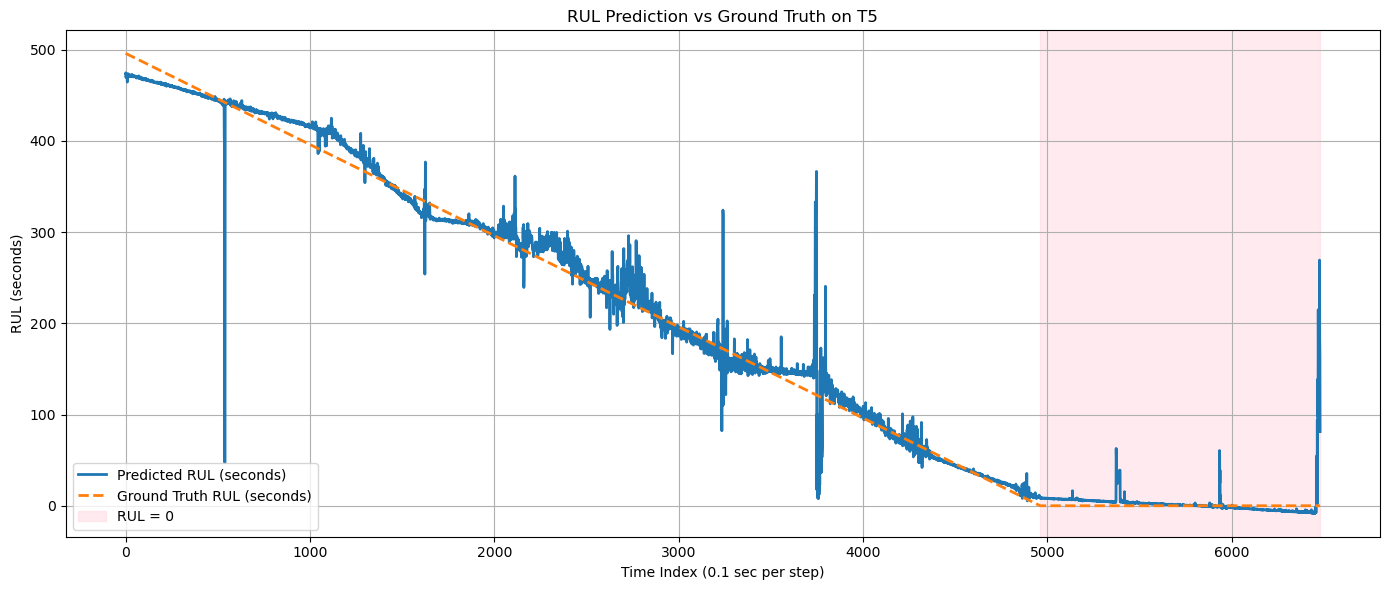

In [26]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

# === ‚úÖ T5 TEST Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df_cnn_test = pd.read_csv("cnn_predictions.csv")  # CNN ÌôïÎ•†
df_gru_test = pd.read_csv("regression_predictions_lstm_T5.csv")  # GRU ÏòàÏ∏°Í∞í

# === ‚úÖ Feature Íµ¨ÏÑ±
X_test = np.column_stack((df_gru_test["Regression_Output"][:6480], df_cnn_test["Anomaly_Probability"]))
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

# === ‚úÖ Ground Truth RUL (Ï¥à Îã®ÏúÑ)
rul_gt = np.array([max(0, (4960 - i) * 0.1) for i in range(6480)])


# === ‚úÖ ÏòàÏ∏°
with torch.no_grad():
    rul_pred = model(X_test_tensor).cpu().numpy().flatten()

# === ‚úÖ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
plt.plot(rul_pred, label='Predicted RUL (seconds)', linewidth=2)
plt.plot(rul_gt, label='Ground Truth RUL (seconds)', linewidth=2, linestyle='--')

# üî¥ ÏàòÎ™Ö Ï¢ÖÎ£å Ïù¥ÌõÑ ÏòÅÏó≠ (Î∂ÑÌôçÏÉâ ÏùåÏòÅ)
plt.axvspan(4960, 6480, color='pink', alpha=0.3, label='RUL = 0 ')

plt.xlabel('Time Index (0.1 sec per step)')
plt.ylabel('RUL (seconds)')
plt.title('RUL Prediction vs Ground Truth on T5')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


‚úÖ T5 Test Set ÏÑ±Îä• ÌèâÍ∞Ä
Accuracy : 0.9861
F1 Score : 0.9700
AUROC    : 0.9935


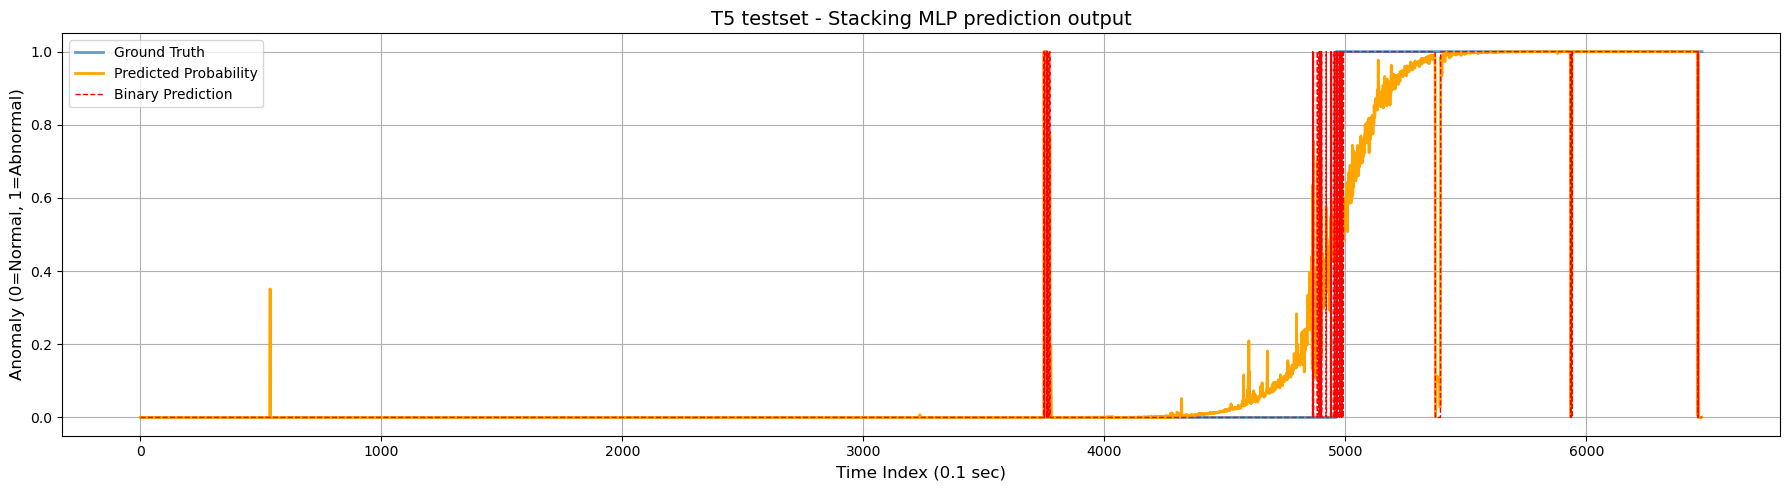

In [27]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# === ‚úÖ T5 TEST CSV Î∂àÎü¨Ïò§Í∏∞ ===
df_cnn_test = pd.read_csv("cnn_predictions.csv")  # CNN ÌôïÎ•†
df_gru_test = pd.read_csv("regression_predictions_lstm_T5.csv")  # GRU ÏòàÏ∏°Í∞í

# === ‚úÖ Feature ÏÉùÏÑ± (GRU + CNN)
X_test = np.column_stack((df_gru_test["Regression_Output"][:6480], df_cnn_test["Anomaly_Probability"]))
y_test = np.array([1 if i >= 4961 else 0 for i in range(len(X_test))])  # Ground Truth

# === ‚úÖ Tensor Î≥ÄÌôò
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1).to(device)

# === ‚úÖ Î™®Îç∏ ÌèâÍ∞Ä
mlp_model.eval()
with torch.no_grad():
    y_pred_prob = mlp_model(X_test_tensor).cpu().numpy().flatten()
    y_pred_cls = (y_pred_prob > 0.5).astype(int)

# === ‚úÖ ÏÑ±Îä• ÏßÄÌëú Ï∂úÎ†•
print("‚úÖ T5 Test Set ÏÑ±Îä• ÌèâÍ∞Ä")
print(f"Accuracy : {accuracy_score(y_test, y_pred_cls):.4f}")
print(f"F1 Score : {f1_score(y_test, y_pred_cls):.4f}")
print(f"AUROC    : {roc_auc_score(y_test, y_pred_prob):.4f}")

# === ‚úÖ Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(18, 5))
plt.plot(y_test, label="Ground Truth", linewidth=2, alpha=0.7)
plt.plot(y_pred_prob, label="Predicted Probability", color='orange', linewidth=2)
plt.plot(y_pred_cls, label="Binary Prediction", linestyle='--', color='red', linewidth=1)

plt.title("T5 testset - Stacking MLP prediction output", fontsize=14)
plt.xlabel("Time Index (0.1 sec)", fontsize=12)
plt.ylabel("Anomaly (0=Normal, 1=Abnormal)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



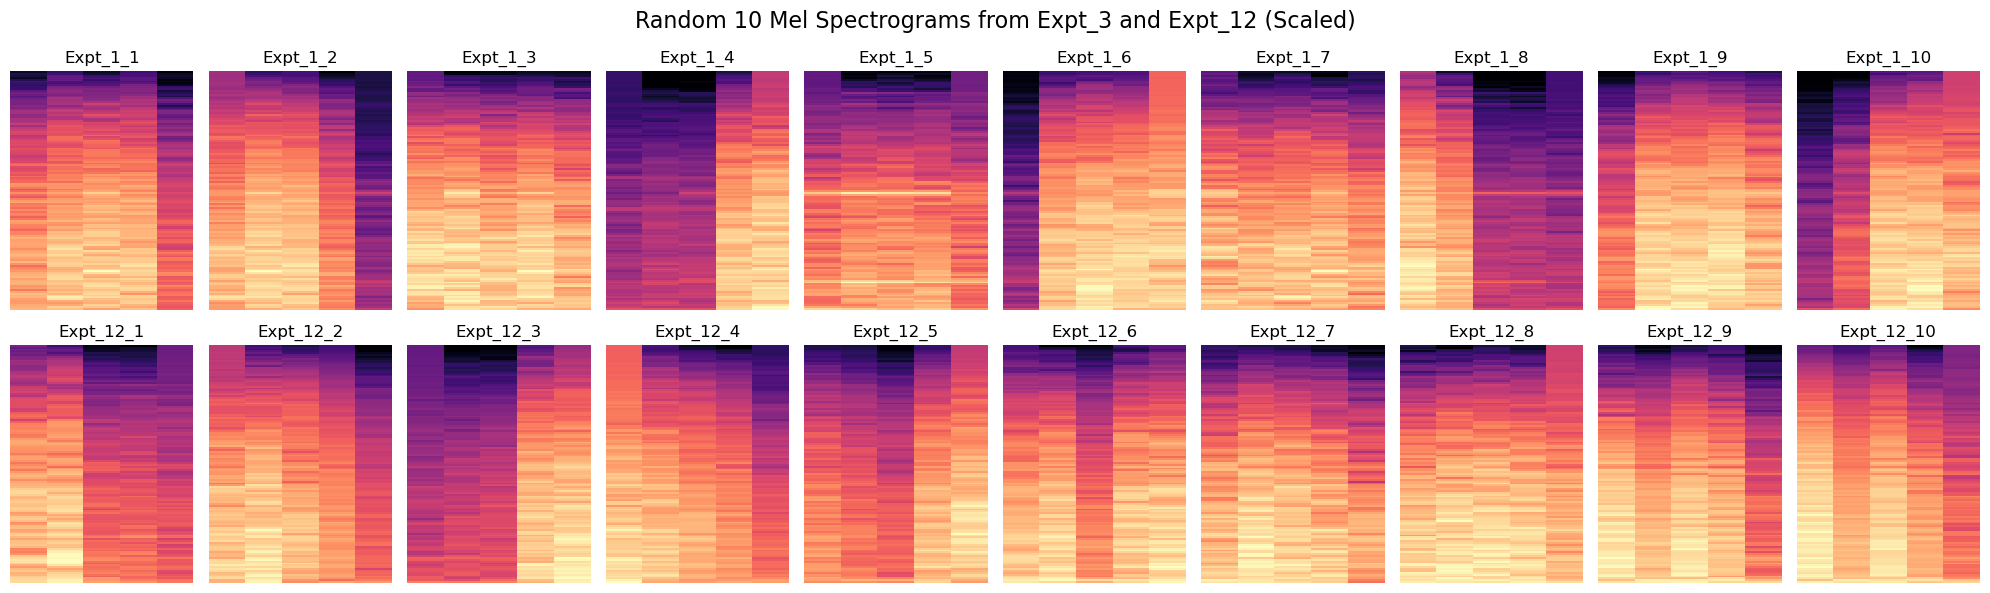

In [36]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import random

# === ‚úÖ ÏÑ§Ï†ï ===
data_dir = "/home/crois-times/timeseries/projects/tool_wear_havard/data/dataverse_files/Dataset/T1/Acoustic_Emission_Data"
num_splits = 10  # Î¨¥ÏûëÏúÑÎ°ú 10Í∞úÎßå ÏÉùÏÑ±ÌïòÏó¨ ÏãúÍ∞ÅÌôî
window_size = 1000  # STFT ÏúàÎèÑÏö∞ ÌÅ¨Í∏∞
desired_length = 2048  # Î≥¥Í∞Ñ ÌõÑ Ïã†Ìò∏ Í∏∏Ïù¥
sr = 1000  # ÏÉòÌîåÎßÅ Î†àÏù¥Ìä∏
n_fft = 1000  # FFT ÌÅ¨Í∏∞
hop_length = 512  # STFT hop ÌÅ¨Í∏∞
n_mels = 128  # Mel ÌïÑÌÑ∞ Í∞úÏàò
fmax = 500  # Ï†ÄÏ£ºÌåå Í∞ïÏ°∞

# === ‚úÖ Mel Spectrogram Î≥ÄÌôò Ìï®Ïàò ===
def generate_mel_spectrogram(signal, sr=1000, n_fft=1000, hop_length=512, n_mels=128, fmax=500):
    """Mel Spectrogram Î≥ÄÌôò (Ï†ÄÏ£ºÌåå Í∞ïÏ°∞)"""
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, 
                                              n_mels=n_mels, fmin=0, fmax=fmax)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.min)  # ÏïΩÌïú Ïã†Ìò∏ÎèÑ Í∞ïÏ°∞
    return mel_spec_db

# === ‚úÖ Expt_3Í≥º Expt_12ÏóêÏÑú Î¨¥ÏûëÏúÑ 10Í∞ú ÏÉùÏÑ± Î∞è ÏãúÍ∞ÅÌôî ===
fig, axes = plt.subplots(2, 10, figsize=(20, 6))

for row_idx, expt_idx in enumerate([1, 12]):  # Expt_3, Expt_12 Ï≤òÎ¶¨
    file_path = os.path.join(data_dir, f"Expt_{expt_idx}.csv")
    
    # CSV ÌååÏùº ÏùΩÍ∏∞
    df = pd.read_csv(file_path)
    
    # Î¨¥ÏûëÏúÑ ÏãúÏûëÏ†ê ÏÑ†ÌÉù (Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù ÏÑ§Ï†ï)
    start_indices = random.sample(range(0, len(df) - window_size), num_splits)
    
    for col_idx, start in enumerate(start_indices):
        # Ïä¨ÎùºÏù¥Ïã±
        df_split = df.iloc[start : start + window_size].reset_index(drop=True)
        
        # Ïã†Ìò∏ Îç∞Ïù¥ÌÑ∞ (Ï≤´ Î≤àÏß∏ Ïª¨Îüº ÏÇ¨Ïö©)
        signal = df_split.iloc[:, 0].values
        
        # Î≥¥Í∞Ñ Ï†ÅÏö© (Í∏∏Ïù¥ ÎßûÏ∂îÍ∏∞)
        x_original = np.linspace(0, 1, len(signal))
        x_new = np.linspace(0, 1, desired_length)
        interpolator = interp1d(x_original, signal, kind='linear')
        signal_interpolated = interpolator(x_new)
        
        # === ‚úÖ Î∞©Î≤ï 4 Ï†ÅÏö©: Ïã†Ìò∏ ÌÅ¨Í∏∞ Scaling ===
        signal_scaled = signal_interpolated * np.mean(signal_interpolated)  # ÌÅ¨Í∏∞Ïóê ÎπÑÎ°ÄÌïú Scaling
        
        # Mel Spectrogram Î≥ÄÌôò
        melspec_db = generate_mel_spectrogram(signal_scaled, sr, n_fft, hop_length, n_mels, fmax)
        
        # ÏãúÍ∞ÅÌôî
        librosa.display.specshow(melspec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].set_title(f"Expt_{expt_idx}_{col_idx+1}")
        axes[row_idx, col_idx].axis("off")

plt.suptitle("Random 10 Mel Spectrograms from Expt_3 and Expt_12 (Scaled)", fontsize=16)
plt.tight_layout()
plt.show()


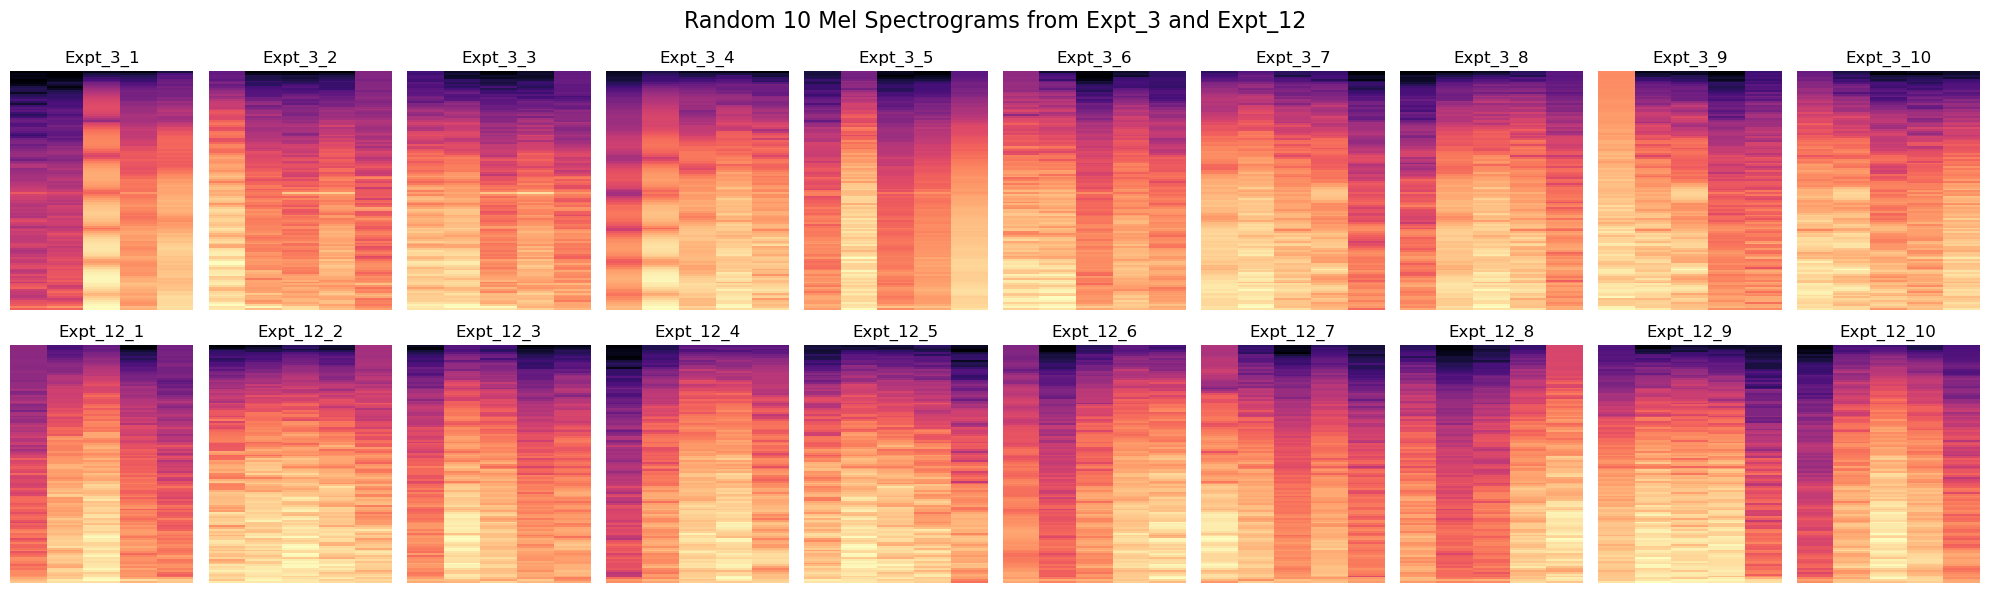

In [22]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import random

# === ‚úÖ ÏÑ§Ï†ï ===
data_dir = "/home/crois-times/timeseries/projects/tool_wear_havard/data/dataverse_files/Dataset/T1/Acoustic_Emission_Data"
num_splits = 10  # Î¨¥ÏûëÏúÑÎ°ú 10Í∞úÎßå ÏÉùÏÑ±ÌïòÏó¨ ÏãúÍ∞ÅÌôî
window_size = 1000  # STFT ÏúàÎèÑÏö∞ ÌÅ¨Í∏∞
desired_length = 2048  # Î≥¥Í∞Ñ ÌõÑ Ïã†Ìò∏ Í∏∏Ïù¥
sr = 1000  # ÏÉòÌîåÎßÅ Î†àÏù¥Ìä∏
n_fft = 1000  # FFT ÌÅ¨Í∏∞
hop_length = 512  # STFT hop ÌÅ¨Í∏∞
n_mels = 128  # Mel ÌïÑÌÑ∞ Í∞úÏàò
fmax = 500  # Ï†ÄÏ£ºÌåå Í∞ïÏ°∞

# === ‚úÖ Mel Spectrogram Î≥ÄÌôò Ìï®Ïàò ===
def generate_mel_spectrogram(signal, sr=1000, n_fft=1000, hop_length=512, n_mels=128, fmax=500):
    """Mel Spectrogram Î≥ÄÌôò (Ï†ÄÏ£ºÌåå Í∞ïÏ°∞)"""
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin=0, fmax=fmax)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.min)  # ÏïΩÌïú Ïã†Ìò∏ÎèÑ Í∞ïÏ°∞
    return mel_spec_db

# === ‚úÖ Expt_3Í≥º Expt_12ÏóêÏÑú Î¨¥ÏûëÏúÑ 10Í∞ú ÏÉùÏÑ± ===
fig, axes = plt.subplots(2, 10, figsize=(20, 6))

for row_idx, expt_idx in enumerate([3, 12]):  # Expt_3, Expt_12 Ï≤òÎ¶¨
    file_path = os.path.join(data_dir, f"Expt_{expt_idx}.csv")
    
    # CSV ÌååÏùº ÏùΩÍ∏∞
    df = pd.read_csv(file_path)
    
    # Î¨¥ÏûëÏúÑ ÏãúÏûëÏ†ê ÏÑ†ÌÉù (Í≤πÏπòÏßÄ ÏïäÎèÑÎ°ù ÏÑ§Ï†ï)
    start_indices = random.sample(range(0, len(df) - window_size), num_splits)
    
    for col_idx, start in enumerate(start_indices):
        # Ïä¨ÎùºÏù¥Ïã±
        df_split = df.iloc[start : start + window_size].reset_index(drop=True)
        
        # Ïã†Ìò∏ Îç∞Ïù¥ÌÑ∞ (Ï≤´ Î≤àÏß∏ Ïª¨Îüº ÏÇ¨Ïö©)
        signal = df_split.iloc[:, 0].values
        
        # Î≥¥Í∞Ñ Ï†ÅÏö© (Í∏∏Ïù¥ ÎßûÏ∂îÍ∏∞)
        x_original = np.linspace(0, 1, len(signal))
        x_new = np.linspace(0, 1, desired_length)
        interpolator = interp1d(x_original, signal, kind='linear')
        signal_interpolated = interpolator(x_new)
        
        # Mel Spectrogram Î≥ÄÌôò
        melspec_db = generate_mel_spectrogram(signal_interpolated, sr, n_fft, hop_length, n_mels, fmax)
        
        # ÏãúÍ∞ÅÌôî
        librosa.display.specshow(melspec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=axes[row_idx, col_idx])
        axes[row_idx, col_idx].set_title(f"Expt_{expt_idx}_{col_idx+1}")
        axes[row_idx, col_idx].axis("off")

plt.suptitle("Random 10 Mel Spectrograms from Expt_3 and Expt_12", fontsize=16)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

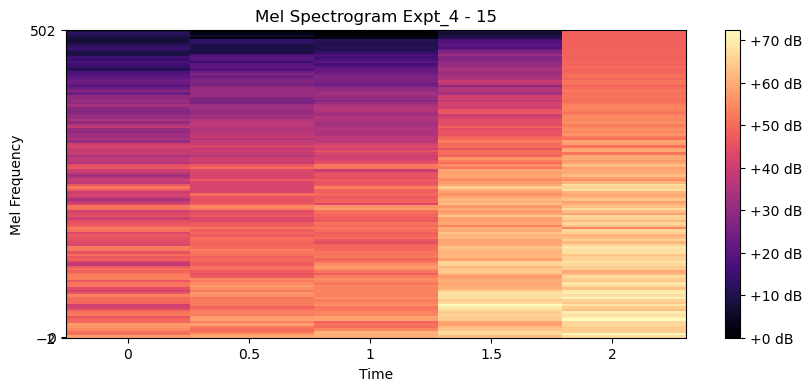

In [20]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# === ‚úÖ ÏÑ§Ï†ï ===
data_dir = "/home/crois-times/timeseries/projects/tool_wear_havard/data/dataverse_files/Dataset/T1/Acoustic_Emission_Data"
output_dir = "JJ/Harvard_Multimodal/Mel_spectrogram/T1"
num_splits = 540  # ÏÉùÏÑ±Ìï† Mel Spectrogram Í∞úÏàò
window_size = 1000  # STFT ÏúàÎèÑÏö∞ ÌÅ¨Í∏∞
desired_length = 2048  # Î≥¥Í∞Ñ ÌõÑ Ïã†Ìò∏ Í∏∏Ïù¥
sr = 1000  # ÏÉòÌîåÎßÅ Î†àÏù¥Ìä∏ (1000Hz, ÎèôÏùºÌïú Ï°∞Í±¥ Ïú†ÏßÄ)
n_fft = 1000  # FFT ÌÅ¨Í∏∞ (Ï°∞Í±¥ Ïú†ÏßÄ)
hop_length = 512  # STFT hop ÌÅ¨Í∏∞
n_mels = 128  # Mel ÌïÑÌÑ∞ Í∞úÏàò
fmax = 500  # Ï†ÄÏ£ºÌåå Í∞ïÏ°∞ (Í≥†Ï£ºÌåå ÏòÅÌñ• Ï§ÑÏù¥Í∏∞)

# Ï∂úÎ†• Ìè¥Îçî ÏÉùÏÑ±
os.makedirs(output_dir, exist_ok=True)

# === ‚úÖ Mel Spectrogram Î≥ÄÌôò Ìï®Ïàò ===
def generate_mel_spectrogram(signal, sr=1000, n_fft=1000, hop_length=512, n_mels=128, fmax=500):
    """Mel Spectrogram Î≥ÄÌôò (Ï†ÄÏ£ºÌåå Í∞ïÏ°∞)"""
    mel_spec = librosa.feature.melspectrogram(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, fmin=0, fmax=fmax)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.min)  # ÏïΩÌïú Ïã†Ìò∏ÎèÑ Í∞ïÏ°∞
    return mel_spec_db

# === ‚úÖ Expt_1~Expt_12 Î∞òÎ≥µ ===
image_index = 1  # Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄ Î≤àÌò∏
for expt_idx in range(1, 13):  # Expt_1 ~ Expt_12
    file_path = os.path.join(data_dir, f"Expt_{expt_idx}.csv")
    
    # CSV ÌååÏùº ÏùΩÍ∏∞
    df = pd.read_csv(file_path)
    
    # Stride Í≥ÑÏÇ∞ (Í≤πÏπòÎèÑÎ°ù ÏûêÎèô Ï°∞Ï†ï)
    stride = (len(df) - window_size) // (num_splits - 1)
    
    # 540Í∞ú Mel Spectrogram ÏÉùÏÑ±
    for split_idx in range(num_splits):
        # Ïä¨ÎùºÏù¥Ïã±
        df_split = df.iloc[split_idx * stride : split_idx * stride + window_size].reset_index(drop=True)
        
        # Ïã†Ìò∏ Îç∞Ïù¥ÌÑ∞ (Ï≤´ Î≤àÏß∏ Ïª¨Îüº ÏÇ¨Ïö©)
        signal = df_split.iloc[:, 0].values
        
        # Î≥¥Í∞Ñ Ï†ÅÏö© (Í∏∏Ïù¥ ÎßûÏ∂îÍ∏∞)
        x_original = np.linspace(0, 1, len(signal))
        x_new = np.linspace(0, 1, desired_length)
        interpolator = interp1d(x_original, signal, kind='linear')
        signal_interpolated = interpolator(x_new)
        
        # Mel Spectrogram Î≥ÄÌôò
        melspec_db = generate_mel_spectrogram(signal_interpolated, sr, n_fft, hop_length, n_mels, fmax)
        
        # ÏãúÍ∞ÅÌôî Î∞è Ï†ÄÏû•
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(melspec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Mel Spectrogram Expt_{expt_idx} - {split_idx+1}")
        plt.xlabel("Time")
        plt.ylabel("Mel Frequency")
        
        # ÌååÏùº Ï†ÄÏû•
        file_name = f"{image_index}_Expt_{expt_idx}.png"
        save_path = os.path.join(output_dir, file_name)
        plt.savefig(save_path)
        plt.close()
        
        # Ïù¥ÎØ∏ÏßÄ Ïù∏Îç±Ïä§ Ï¶ùÍ∞Ä
        image_index += 1

print(f"Mel Spectrogram ÏÉùÏÑ± ÏôÑÎ£å. Ï¥ù {image_index-1}Í∞ú Ïù¥ÎØ∏ÏßÄ Ï†ÄÏû•Îê®.")
